## Load and clean data

In [1]:
import numpy as np
import pandas
import pandas as pd
#import brewer2mpl
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()
%matplotlib inline

ufo_data = pd.read_csv('scrubbed.csv', usecols=[0, 1, 2,3, 9, 10], low_memory=False)
ufo_data['datetime'] = pd.to_datetime(ufo_data['datetime'], errors='coerce')
ufo_data.insert(1, 'year', ufo_data['datetime'].dt.year)
ufo_data['year'] = ufo_data['year'].fillna(0).astype(int)
ufo_data['city'] = ufo_data['city'].str.title()
ufo_data['state'] = ufo_data['state'].str.upper()
ufo_data['country'] = ufo_data['country'].str.upper()
ufo_data['latitude'] = pd.to_numeric(ufo_data['latitude'], errors='coerce')
ufo_data = ufo_data.rename(columns={'longitude ':'longitude'})



## World map with normalized sightings count

In [2]:
ufo_data['text'] = ufo_data[ufo_data.year > 0]['datetime'].dt.strftime('%B %-d, %Y')

data = [
    dict(
        type = 'scattergeo',
        lon = ufo_data[ufo_data.year > 0]['longitude'],
        lat = ufo_data[ufo_data.year > 0]['latitude'],
        text = ufo_data[ufo_data.year > 0]['text'],
        mode = 'markers',
        marker = dict(
            size = 6,
            opacity = 1,
            color = 'rgb(247, 82, 56)',
            line = dict(color = 'rgb(255, 255, 255)', width = 1)
        )
    )
]
layout = dict(
    title = 'UFO Reported in the world by Latitude/Longitude (1910-2014)',
    geo = dict(
        scope = 'world',
        projection = dict(type = 'natural earth'),
        showland = True,
        landcolor = 'rgb(250, 250, 250)',
        subunitwidth = 1,
        subunitcolor = 'rgb(100, 100, 100)',
        countrywidth = 1,
        countrycolor = 'rgb(100, 100, 100)',
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'
    )
)

ufo_map = dict(data = data, layout = layout)
iplot(ufo_map)

In [3]:
x=ufo_data['country'].value_counts()
x


US    65114
CA     3000
GB     1905
AU      538
DE      105
Name: country, dtype: int64

### Number of reported incidents by Country

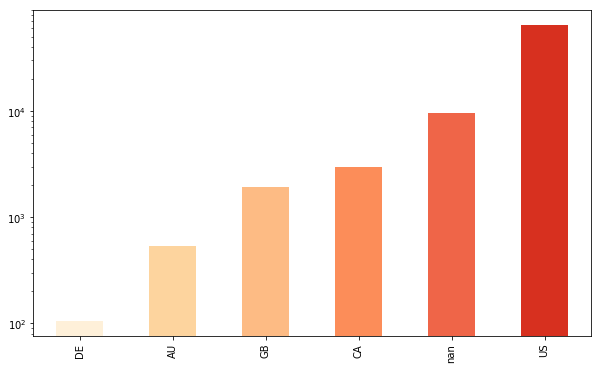

In [4]:
from collections import Counter

country_counts = Counter(ufo_data['country'])
df = pandas.DataFrame.from_dict(country_counts, orient='index' )
df = df.sort_values(by=0, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

bmap = brewer2mpl.get_map('OrRd','Sequential',7,reverse=False)
colors = bmap.mpl_colors

df.plot(kind='bar',logy=True,legend=False, figsize=(10,6), color=colors)


### Number of reported incidents by States

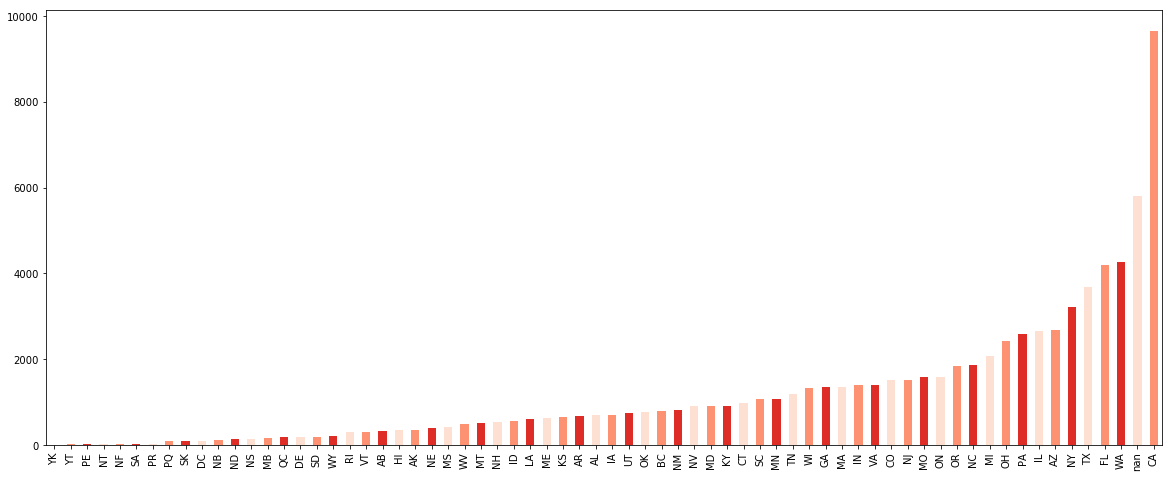

In [5]:
from collections import Counter

state_count = Counter(ufo_data['state'])

df = pandas.DataFrame.from_dict(state_count, orient='index')
df = df.sort_values(by=0, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

bmap = brewer2mpl.get_map('reds','Sequential',3,reverse=False)
colors = bmap.mpl_colors
df.plot(kind='bar',legend=False, figsize=(20,8), color=colors)
